In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, BaggingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_auc_score, recall_score
from sklearn.preprocessing import StandardScaler

def repeated_k_fold(model, X, y, n_splits=5, n_repeats=10):
    """Führt repeated k-fold cross-validation durch und berechnet die Metriken."""
    # Repeated Stratified K-Fold
    rkf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

    # Metriken definieren
    accuracy_train = []
    accuracy_test = []
    f1 = []
    recall = []  
    roc_auc = []

    for train_index, test_index in rkf.split(X, y):
        # Splitte die Daten in Trainings- und Testdaten
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Trainiere das Modell
        model.fit(X_train, y_train)

        # Vorhersagen für Trainings- und Testdaten
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Berechne die Metriken
        accuracy_train.append(accuracy_score(y_train, y_train_pred))
        accuracy_test.append(accuracy_score(y_test, y_test_pred))
        f1.append(f1_score(y_test, y_test_pred))
        recall.append(recall_score(y_test, y_test_pred))  
        roc_auc.append(roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

    # Durchschnittswerte berechnen
    return {
        "Train Accuracy": np.mean(accuracy_train),
        "Test Accuracy": np.mean(accuracy_test),
        "F1-Score": np.mean(f1),
        "Recall": np.mean(recall), 
        "ROC-AUC": np.mean(roc_auc),
    }

# Pfad zur Datei
file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"

# Excel-Datei einlesen
try:
    # Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
    df = pd.read_excel(file_path)

    # Zielvariable (y) und Features (X) extrahieren
    y = df['Verletzungsstatus']
    X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

    # Spezifische Dummy-Spalte für das Geschlecht (die nicht normalisiert werden soll)
    dummy_columns = ['Geschlecht_weiblich']  # Liste der Dummy-Spalten, die nicht normalisiert werden sollen

    # Trenne die Dummy-Spalte(n) von den anderen numerischen Spalten
    X_dummies = X[dummy_columns]  # Dummy-Variablen
    X_numerical = X.drop(columns=dummy_columns)  # Andere numerische Features

    # Skalierung der numerischen Features mit StandardScaler
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_numerical)

    # Füge die Dummy-Spalten wieder zu den normalisierten numerischen Features hinzu
    X_final = np.concatenate([X_scaled, X_dummies], axis=1)

    # Modelle definieren
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(eval_metric="logloss", random_state=42),
        "LightGBM": LGBMClassifier(verbose=-1, random_state=42),
        "SVC": SVC(probability=True, random_state=42),
        "k-Nearest Neighbors": KNeighborsClassifier(),
        "MLP Classifier": MLPClassifier(max_iter=1000, random_state=42),
        "Gaussian Naive Bayes": GaussianNB(),
        "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
        "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
        "Bagging Classifier": BaggingClassifier(random_state=42),
        "Extra Trees": ExtraTreesClassifier(random_state=42),
    }

    # Ergebnisse speichern
    results = []

    # Validierung jedes Modells
    for model_name, model in models.items():
        print(f"Modell wird validiert: {model_name}")
        metrics = repeated_k_fold(model, X_final, y)  # Verwende X_final statt X
        results.append({"Model": model_name, **metrics})

    # Ergebnisse in DataFrame konvertieren und sortieren
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values(by="ROC-AUC", ascending=False)

    # Ergebnisse anzeigen
    print("\nErgebnisse der Modelle:")
    print(results_df)

except FileNotFoundError:
    print("Die Datei wurde nicht gefunden. Bitte überprüfen Sie den Pfad.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {e}")


Modell wird validiert: Logistic Regression
Modell wird validiert: Decision Tree
Modell wird validiert: Random Forest
Modell wird validiert: Gradient Boosting
Modell wird validiert: XGBoost
Modell wird validiert: LightGBM


C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' wa

Modell wird validiert: SVC
Modell wird validiert: k-Nearest Neighbors
Modell wird validiert: MLP Classifier
Modell wird validiert: Gaussian Naive Bayes
Modell wird validiert: Linear Discriminant Analysis
Modell wird validiert: Quadratic Discriminant Analysis


C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of param

Modell wird validiert: Bagging Classifier
Modell wird validiert: Extra Trees

Ergebnisse der Modelle:
                              Model  Train Accuracy  Test Accuracy  F1-Score    Recall   ROC-AUC
0               Logistic Regression        1.000000       0.888577  0.892229  0.871795  0.973186
8                    MLP Classifier        1.000000       0.882490  0.887778  0.875513  0.958321
6                               SVC        0.977663       0.844387  0.855196  0.855769  0.938479
4                           XGBoost        1.000000       0.830040  0.834000  0.801282  0.931310
13                      Extra Trees        1.000000       0.823202  0.833244  0.825256  0.925237
3                 Gradient Boosting        1.000000       0.836482  0.842927  0.815897  0.923965
2                     Random Forest        1.000000       0.817154  0.827727  0.821026  0.919907
5                          LightGBM        1.000000       0.815889  0.820686  0.793077  0.912572
9              Gaussian N

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Columns: 119 entries, Verletzungsstatus to UNINV_ISO_Arbeit_Unterschied Extension Flexion 
dtypes: float64(116), int64(3)
memory usage: 105.2 KB


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Daten laden
file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"

# Direkt die Datei einlesen (erstes Tabellenblatt standardmäßig)
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Skalierung der Features (X) mit StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


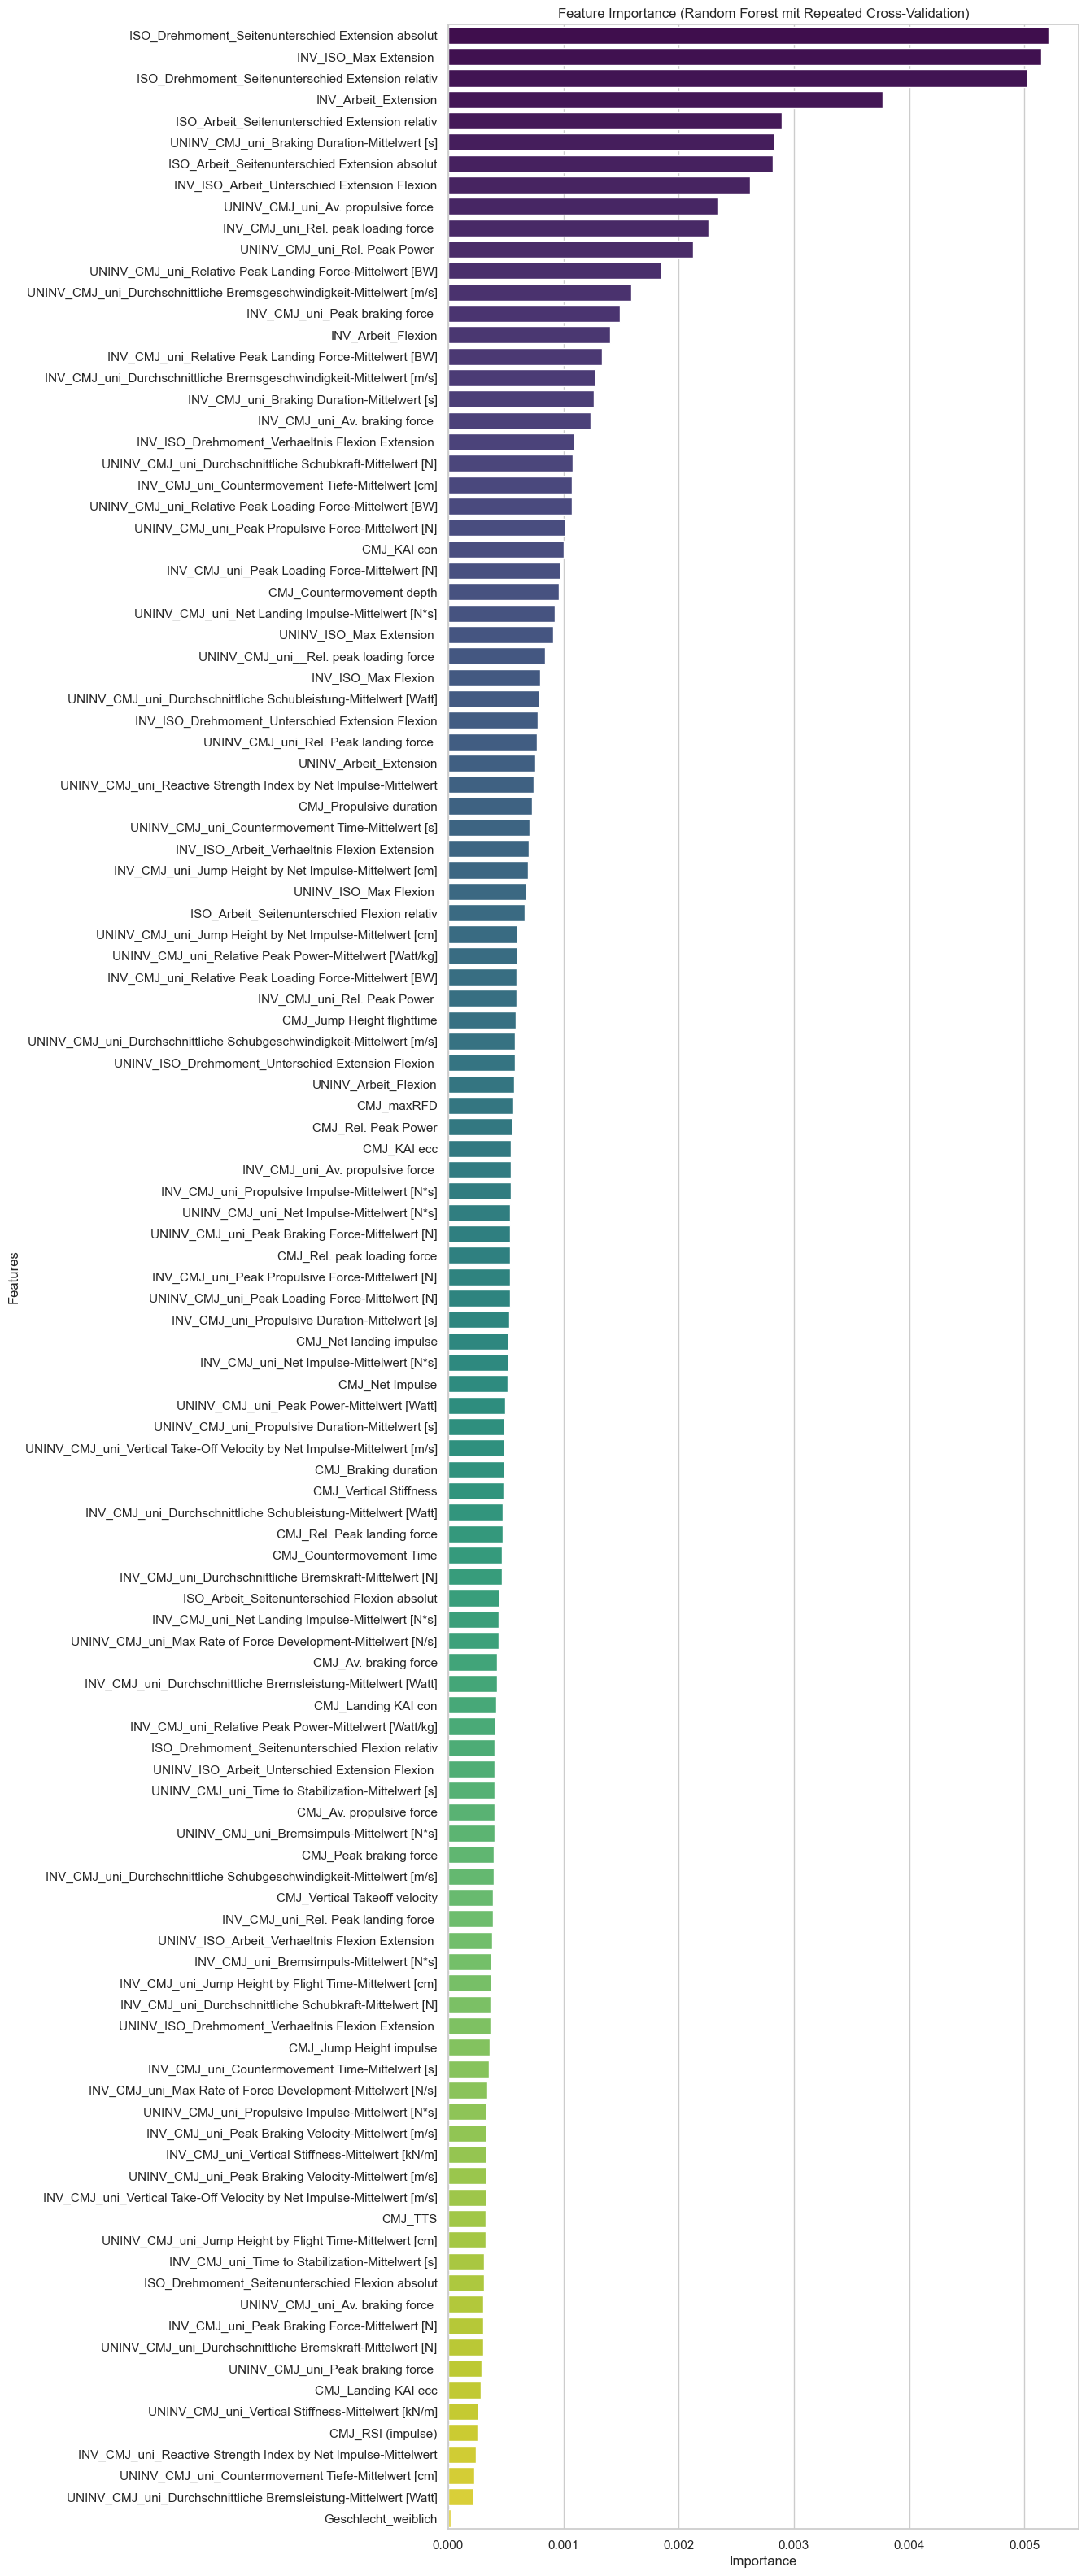

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Daten laden
file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Spezifische Dummy-Spalte für das Geschlecht (die nicht normalisiert werden soll)
dummy_columns = ['Geschlecht_weiblich']  # Liste der Dummy-Spalten, die nicht normalisiert werden sollen

# Trenne die Dummy-Spalte(n) von den anderen numerischen Spalten
X_dummies = X[dummy_columns]  # Dummy-Variablen
X_numerical = X.drop(columns=dummy_columns)  # Andere numerische Features

# Skalierung der numerischen Features mit StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Füge die Dummy-Spalten wieder zu den normalisierten numerischen Features hinzu
X_final = np.concatenate([X_scaled, X_dummies], axis=1)

# Definiere einen Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Wiederholte Cross-Validation Setup (RepeatedStratifiedKFold für Klassifikationsaufgaben)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=42)

# Funktion zur Berechnung der Feature Importance
def calculate_feature_importance(X, y, model, cv):
    feature_importances = np.zeros(X.shape[1])
    
    for train_idx, test_idx in cv.split(X, y):
        # Splitte in Trainings- und Testdaten
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Trainiere das Modell auf den Trainingsdaten
        model.fit(X_train, y_train)
        
        # Berechne die Accuracy (optional, um die Leistung des Modells zu validieren)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Feature Importances nach jeder Fold berechnen
        feature_importances += model.feature_importances_

    # Berechne den Durchschnitt der Feature-Importances über alle Wiederholungen und Folds
    feature_importances /= (cv.get_n_splits() * cv.n_repeats)
    
    return feature_importances

# Berechne die Feature Importance
feature_importances = calculate_feature_importance(X_final, y, rf, cv)

# Erstelle ein DataFrame mit den Feature Importances
feature_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,  # Die Spaltennamen beinhalten jetzt auch die Dummy-Variable
    'Importance': feature_importances
})

# Sortiere die Feature-Importances in absteigender Reihenfolge
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Setze die Seaborn-Optik für bessere Darstellungen
sns.set(style="whitegrid", palette="muted")  

# Visualisiere die Feature Importances als horizontalen Balkendiagramm
plt.figure(figsize=(10, 40))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance (Random Forest mit Repeated Cross-Validation)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


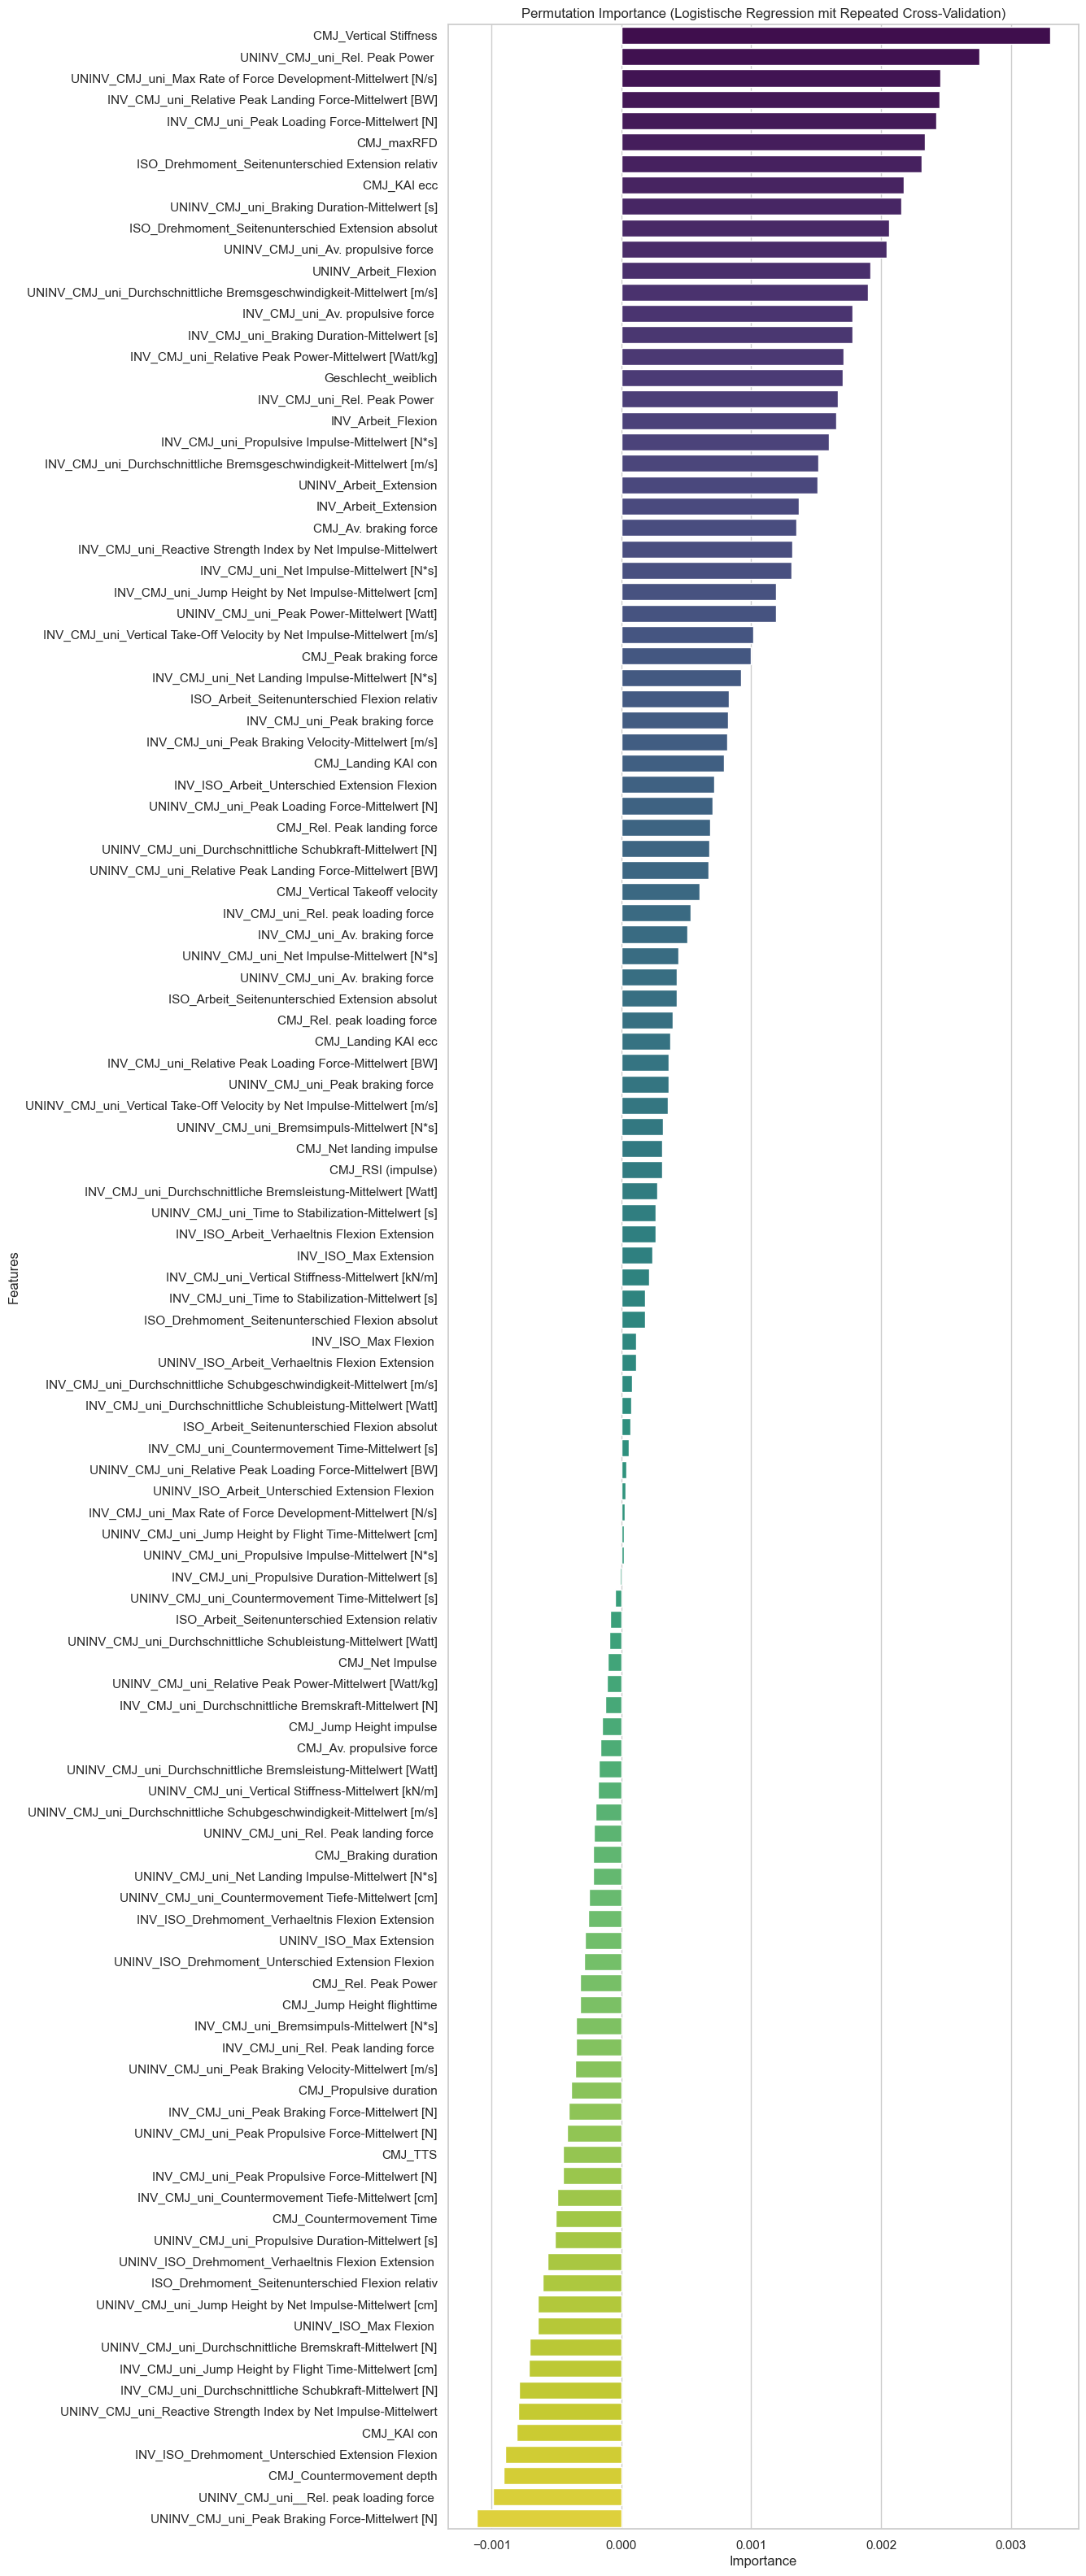

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

# Daten laden
file_path = r"C:\Users\michi\Documents\Basistabelle_alle_PostOP_ML.xlsx"
df = pd.read_excel(file_path)

# Zielvariable (y) und Features (X) extrahieren
y = df['Verletzungsstatus']
X = df.drop(columns=['Verletzungsstatus'])  # Entferne die Zielvariable aus den Features

# Spezifische Dummy-Spalte für das Geschlecht (die nicht normalisiert werden soll)
dummy_columns = ['Geschlecht_weiblich']  # Liste der Dummy-Spalten, die nicht normalisiert werden sollen

# Trenne die Dummy-Spalte(n) von den anderen numerischen Spalten
X_dummies = X[dummy_columns]  # Dummy-Variablen
X_numerical = X.drop(columns=dummy_columns)  # Andere numerische Features

# Skalierung der numerischen Features mit StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

# Füge die Dummy-Spalten wieder zu den normalisierten numerischen Features hinzu
X_final = np.concatenate([X_scaled, X_dummies], axis=1)

# Definiere eine logistische Regression
log_reg = LogisticRegression(solver='liblinear', random_state=42)

# Wiederholte Cross-Validation Setup (RepeatedStratifiedKFold für Klassifikationsaufgaben)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

# Berechnung der Permutation Importance unter Verwendung von Cross-Validation
def calculate_permutation_importance(X, y, model, cv):
    permutation_importances = np.zeros(X.shape[1])
    
    for train_idx, test_idx in cv.split(X, y):
        # Splitte in Trainings- und Testdaten
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        
        # Trainiere das Modell auf den Trainingsdaten
        model.fit(X_train, y_train)
        
        # Berechne die Accuracy vor der Permutation
        accuracy = accuracy_score(y_test, model.predict(X_test))
        
        # Berechne die Permutation Importance für jedes Feature
        result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
        
        # Füge die Permutation Importance für jedes Feature hinzu
        permutation_importances += result.importances_mean

    # Berechne den Durchschnitt der Permutation-Importances über alle Wiederholungen und Folds
    permutation_importances /= (cv.get_n_splits() * cv.n_repeats)
    
    return permutation_importances

# Berechne die Permutation Importance
permutation_importances = calculate_permutation_importance(X_final, y, log_reg, cv)

# Erstelle ein DataFrame mit den Permutation Importances
permutation_importance_df = pd.DataFrame({
    'Feature': list(X_numerical.columns) + dummy_columns,  # Die Spaltennamen beinhalten jetzt auch die Dummy-Variable
    'Importance': permutation_importances
})

# Sortiere die Permutation-Importances in absteigender Reihenfolge
permutation_importance_df = permutation_importance_df.sort_values(by='Importance', ascending=False)

# Setze die Seaborn-Optik für bessere Darstellungen
sns.set(style="whitegrid", palette="muted")

# Visualisiere die Permutation Importances als horizontalen Balkendiagramm
plt.figure(figsize=(10, 40))
sns.barplot(data=permutation_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Permutation Importance (Logistische Regression mit Repeated Cross-Validation)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


In [6]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import (
    accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix
)
from collections import defaultdict

# Daten laden
def load_data(file_path):
    df = pd.read_excel(file_path)
    X = df.drop(columns=["Verletzungsstatus"])
    y = df["Verletzungsstatus"]
    return X, y

def preprocess_data(X):
    # Dummy-Variable separat speichern
    dummy_var = X["Geschlecht_weiblich"]

    # Alle anderen Features normalisieren
    cols_to_scale = [col for col in X.columns if col != "Geschlecht_weiblich"]
    scaler = StandardScaler()
    X_scaled = X.copy()
    X_scaled[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])

    # Dummy-Variable wieder hinzufügen
    X_scaled["Geschlecht_weiblich"] = dummy_var  

    return X_scaled


# Hyperparameter-Optimierung mit Optuna
def optimize_hyperparameters(X, y):
    def objective(trial):
        C = trial.suggest_loguniform("C", 0.0001, 10.0)
        penalty = trial.suggest_categorical("penalty", ["l1", "l2"])
        solver = "liblinear" if penalty == "l1" else "lbfgs"

        model = LogisticRegression(C=C, penalty=penalty, solver=solver, max_iter=500)
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
        scores = cross_val_score(model, X, y, cv=cv, scoring="roc_auc")
        return np.mean(scores)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=50)
    return study.best_params

# Feature-Selektion mit RFE
def select_features(X, y, best_params):
    model = LogisticRegression(**best_params, max_iter=500)
    selector = RFE(model, n_features_to_select=len(X.columns))  # Start mit allen Features
    selector.fit(X, y)
    
    # Beste Anzahl an Features optimieren
    best_n = len(X.columns)
    best_score = 0
    for n in range(1, len(X.columns) + 1):
        selector.n_features_to_select = n
        selector.fit(X, y)
        score = np.mean(cross_val_score(selector.estimator_, X.iloc[:, selector.support_], y, cv=5, scoring="roc_auc"))
        if score > best_score:
            best_score = score
            best_n = n

    # Finales Modell mit optimierter Anzahl an Features
    selector.n_features_to_select = best_n
    selector.fit(X, y)
    return X.iloc[:, selector.support_]


# Äußere Cross-Validation mit Metriken & Confusion Matrix
def nested_cross_validation(X, y, best_params):
    outer_cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)
    
    metrics = defaultdict(list)
    confusion_matrices = []
    confusion_matrices_0 = []
    confusion_matrices_1 = []
    
    for train_idx, test_idx in outer_cv.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model = LogisticRegression(**best_params, max_iter=500)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_prob = model.predict_proba(X_test)[:, 1]

        # Berechnung der Metriken
        metrics["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["recall"].append(recall_score(y_test, y_pred))
        metrics["f1"].append(f1_score(y_test, y_pred))
        metrics["roc_auc"].append(roc_auc_score(y_test, y_prob))

        # Confusion Matrix für Gesamtpopulation
        cm = confusion_matrix(y_test, y_pred)
        confusion_matrices.append(cm)

        # Confusion Matrix für Gruppe 0 (Unverletzte) und Gruppe 1 (Verletzte)
        cm_0 = confusion_matrix(y_test[y_test == 0], y_pred[y_test == 0])
        cm_1 = confusion_matrix(y_test[y_test == 1], y_pred[y_test == 1])

        confusion_matrices_0.append(cm_0 if cm_0.shape == (2, 2) else np.zeros((2, 2)))
        confusion_matrices_1.append(cm_1 if cm_1.shape == (2, 2) else np.zeros((2, 2)))

    # Durchschnittliche Metriken berechnen
    avg_metrics = {key: (np.mean(val), np.std(val)) for key, val in metrics.items()}

    # Durchschnittliche Confusion Matrices berechnen
    avg_cm = np.mean(confusion_matrices, axis=0)
    avg_cm_0 = np.mean(confusion_matrices_0, axis=0)
    avg_cm_1 = np.mean(confusion_matrices_1, axis=0)

    return avg_metrics, avg_cm, avg_cm_0, avg_cm_1

# Main-Funktion zum Steuern des Ablaufs
def main():
    file_path = r"C:\\Users\\michi\\Documents\\Basistabelle_alle_PostOP_ML.xlsx"
    X, y = load_data(file_path)
    X = preprocess_data(X)

    print("Optimierung der Hyperparameter...")
    best_params = optimize_hyperparameters(X, y)
    print(f"Beste Hyperparameter: {best_params}")

    print("Feature-Selektion...")
    X_selected = select_features(X, y, best_params)
    print(f"Verwendete Features: {list(X_selected.columns)}")

    print("Durchführen der äußeren Cross-Validation...")
    avg_metrics, avg_cm, avg_cm_0, avg_cm_1 = nested_cross_validation(X_selected, y, best_params)

    print("\n--- Endgültige Ergebnisse ---")
    for metric, (mean, std) in avg_metrics.items():
        print(f"{metric}: {mean:.4f} ± {std:.4f}")

    print("\nDurchschnittliche Confusion Matrix (Gesamtpopulation):")
    print(avg_cm)

    print("\nDurchschnittliche Confusion Matrix (Gruppe 0 - Unverletzte):")
    print(avg_cm_0)

    print("\nDurchschnittliche Confusion Matrix (Gruppe 1 - Verletzte):")
    print(avg_cm_1)

if __name__ == "__main__":
    main()


[I 2025-02-04 18:59:30,566] A new study created in memory with name: no-name-13e205b1-1be1-4f35-8ef2-3f478b2f2cf8


Optimierung der Hyperparameter...


C:\Users\michi\AppData\Local\Temp\ipykernel_13496\3103877424.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.0001, 10.0)
[I 2025-02-04 18:59:31,203] Trial 0 finished with value: 0.9700955710955711 and parameters: {'C': 3.765226617147815, 'penalty': 'l2'}. Best is trial 0 with value: 0.9700955710955711.
C:\Users\michi\AppData\Local\Temp\ipykernel_13496\3103877424.py:39: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform("C", 0.0001, 10.0)
[I 2025-02-04 18:59:31,827] Trial 1 finished with value: 0.931925407925408 and parameters: {'C': 0.001716510870001723, 'penalty': 'l2'}. Best is trial 0 with value: 0.9700

Beste Hyperparameter: {'C': 0.4239783541864367, 'penalty': 'l2'}
Feature-Selektion...
Verwendete Features: ['INV_CMJ_uni_Rel. peak loading force ', 'CMJ_maxRFD', 'UNINV_CMJ_uni_Rel. Peak Power ', 'CMJ_KAI ecc', 'CMJ_Vertical Stiffness', 'INV_CMJ_uni_Peak braking force ', 'INV_CMJ_uni_Av. braking force ', 'UNINV_CMJ_uni_Av. propulsive force ', 'UNINV_CMJ_uni_Rel. Peak landing force ', 'CMJ_Landing KAI ecc', 'INV_CMJ_uni_Peak Loading Force-Mittelwert [N]', 'INV_CMJ_uni_Vertical Take-Off Velocity by Net Impulse-Mittelwert [m/s]', 'INV_CMJ_uni_Relative Peak Power-Mittelwert [Watt/kg]', 'INV_CMJ_uni_Braking Duration-Mittelwert [s]', 'INV_CMJ_uni_Propulsive Impulse-Mittelwert [N*s]', 'INV_CMJ_uni_Relative Peak Landing Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Peak Loading Force-Mittelwert [N]', 'UNINV_CMJ_uni_Relative Peak Loading Force-Mittelwert [BW]', 'UNINV_CMJ_uni_Max Rate of Force Development-Mittelwert [N/s]', 'UNINV_CMJ_uni_Braking Duration-Mittelwert [s]', 'UNINV_CMJ_uni_Bremsimpuls-Mi

C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was fo


--- Endgültige Ergebnisse ---
accuracy: 0.9524 ± 0.0394
recall: 0.9413 ± 0.0678
f1: 0.9543 ± 0.0391
roc_auc: 0.9957 ± 0.0065

Durchschnittliche Confusion Matrix (Gesamtpopulation):
[[10.04  0.36]
 [ 0.72 11.48]]

Durchschnittliche Confusion Matrix (Gruppe 0 - Unverletzte):
[[3.4  0.36]
 [0.   0.  ]]

Durchschnittliche Confusion Matrix (Gruppe 1 - Verletzte):
[[0.   0.  ]
 [0.72 5.68]]


C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\michi\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was fo